<a href="https://colab.research.google.com/github/zhiruo159/ISOM-4030-Deep-Learning-Assignments/blob/main/Assignment_2_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISOM4030 Assignment 2

<font color='red'><b> Due at 11:59pm on November 8 (Saturday) </b></font>

<font color='red'><b> Please rename this file with your Full Name and Student ID for easier grading. </b></font>

#### Tasks:


The [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 $32 \times 32$ colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In this assignment, you will design and implement a **Feedforward Neural Network (FNN)** and compare its performance with a **Convolutional Neural Network (CNN)** on the CIFAR-10 dataset.

Throughout the implementation, you are expected to apply various deep learning techniques introduced in the course, such as: Dense layers, Conv2D layers, MaxPool2D layers, Batch normalization, Dropout regularization, Activation functions, etc.

You will also perform hyperparameter tuning to optimize model performance and achieve the target evaluation metrics.

The goal is to understand the architectural differences between feedforward and convolutional neural networks, and how different components and configurations affect learning outcomes.












#### **Grading criteria**:

1. Complete all required steps with correct code (i.e., no error messages).

2. Aim for high prediction accuracy in both models.
For the Feedforward Neural Network (FNN), the goal is to achieve **over 90% accuracy on the training set and over 50% accuracy on the validation set**, all **within 100 epochs**.
For the Convolutional Neural Network (CNN), the target is to reach **over 95% training accuracy and over 80% validation accuracy**, also **within 100 epochs**.

3. Follow the instructions to first build a baseline model. Then, implement a more advanced architecture and fine-tune the hyperparameters to achieve improved performance.

4. Briefly explain your journey of the tuning process and what you've learned in the process.

5. Clearly describe the differences between a **Feedforward Neural Network (FNN) **and a **Convolutional Neural Network (CNN)**, focusing on their structures, feature extraction capabilities, and suitability for image classification tasks.




## Step 0: Set up the programming environment

In [1]:
# import data munging libraries
import pandas as pd
import numpy as np

# import drawing libraries and configure drawing settings
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"


# import tensorflow and keras API
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


---

## Step 1: Import and Explore Data

In [ ]:
(X_train, y_train), (X_valid, y_valid) = keras.datasets.cifar10.load_data()

print (f"Each image is of size: {X_train.shape[1:]}")
print (f"X_train's shape: {X_train.shape}"  )
print (f"X_valid's shape: {X_valid.shape}" + str())
print (f"y_train's shape: {y_train.shape}")
print (f"y_valid's shape: {y_valid.shape}" )

167337984/170498071 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

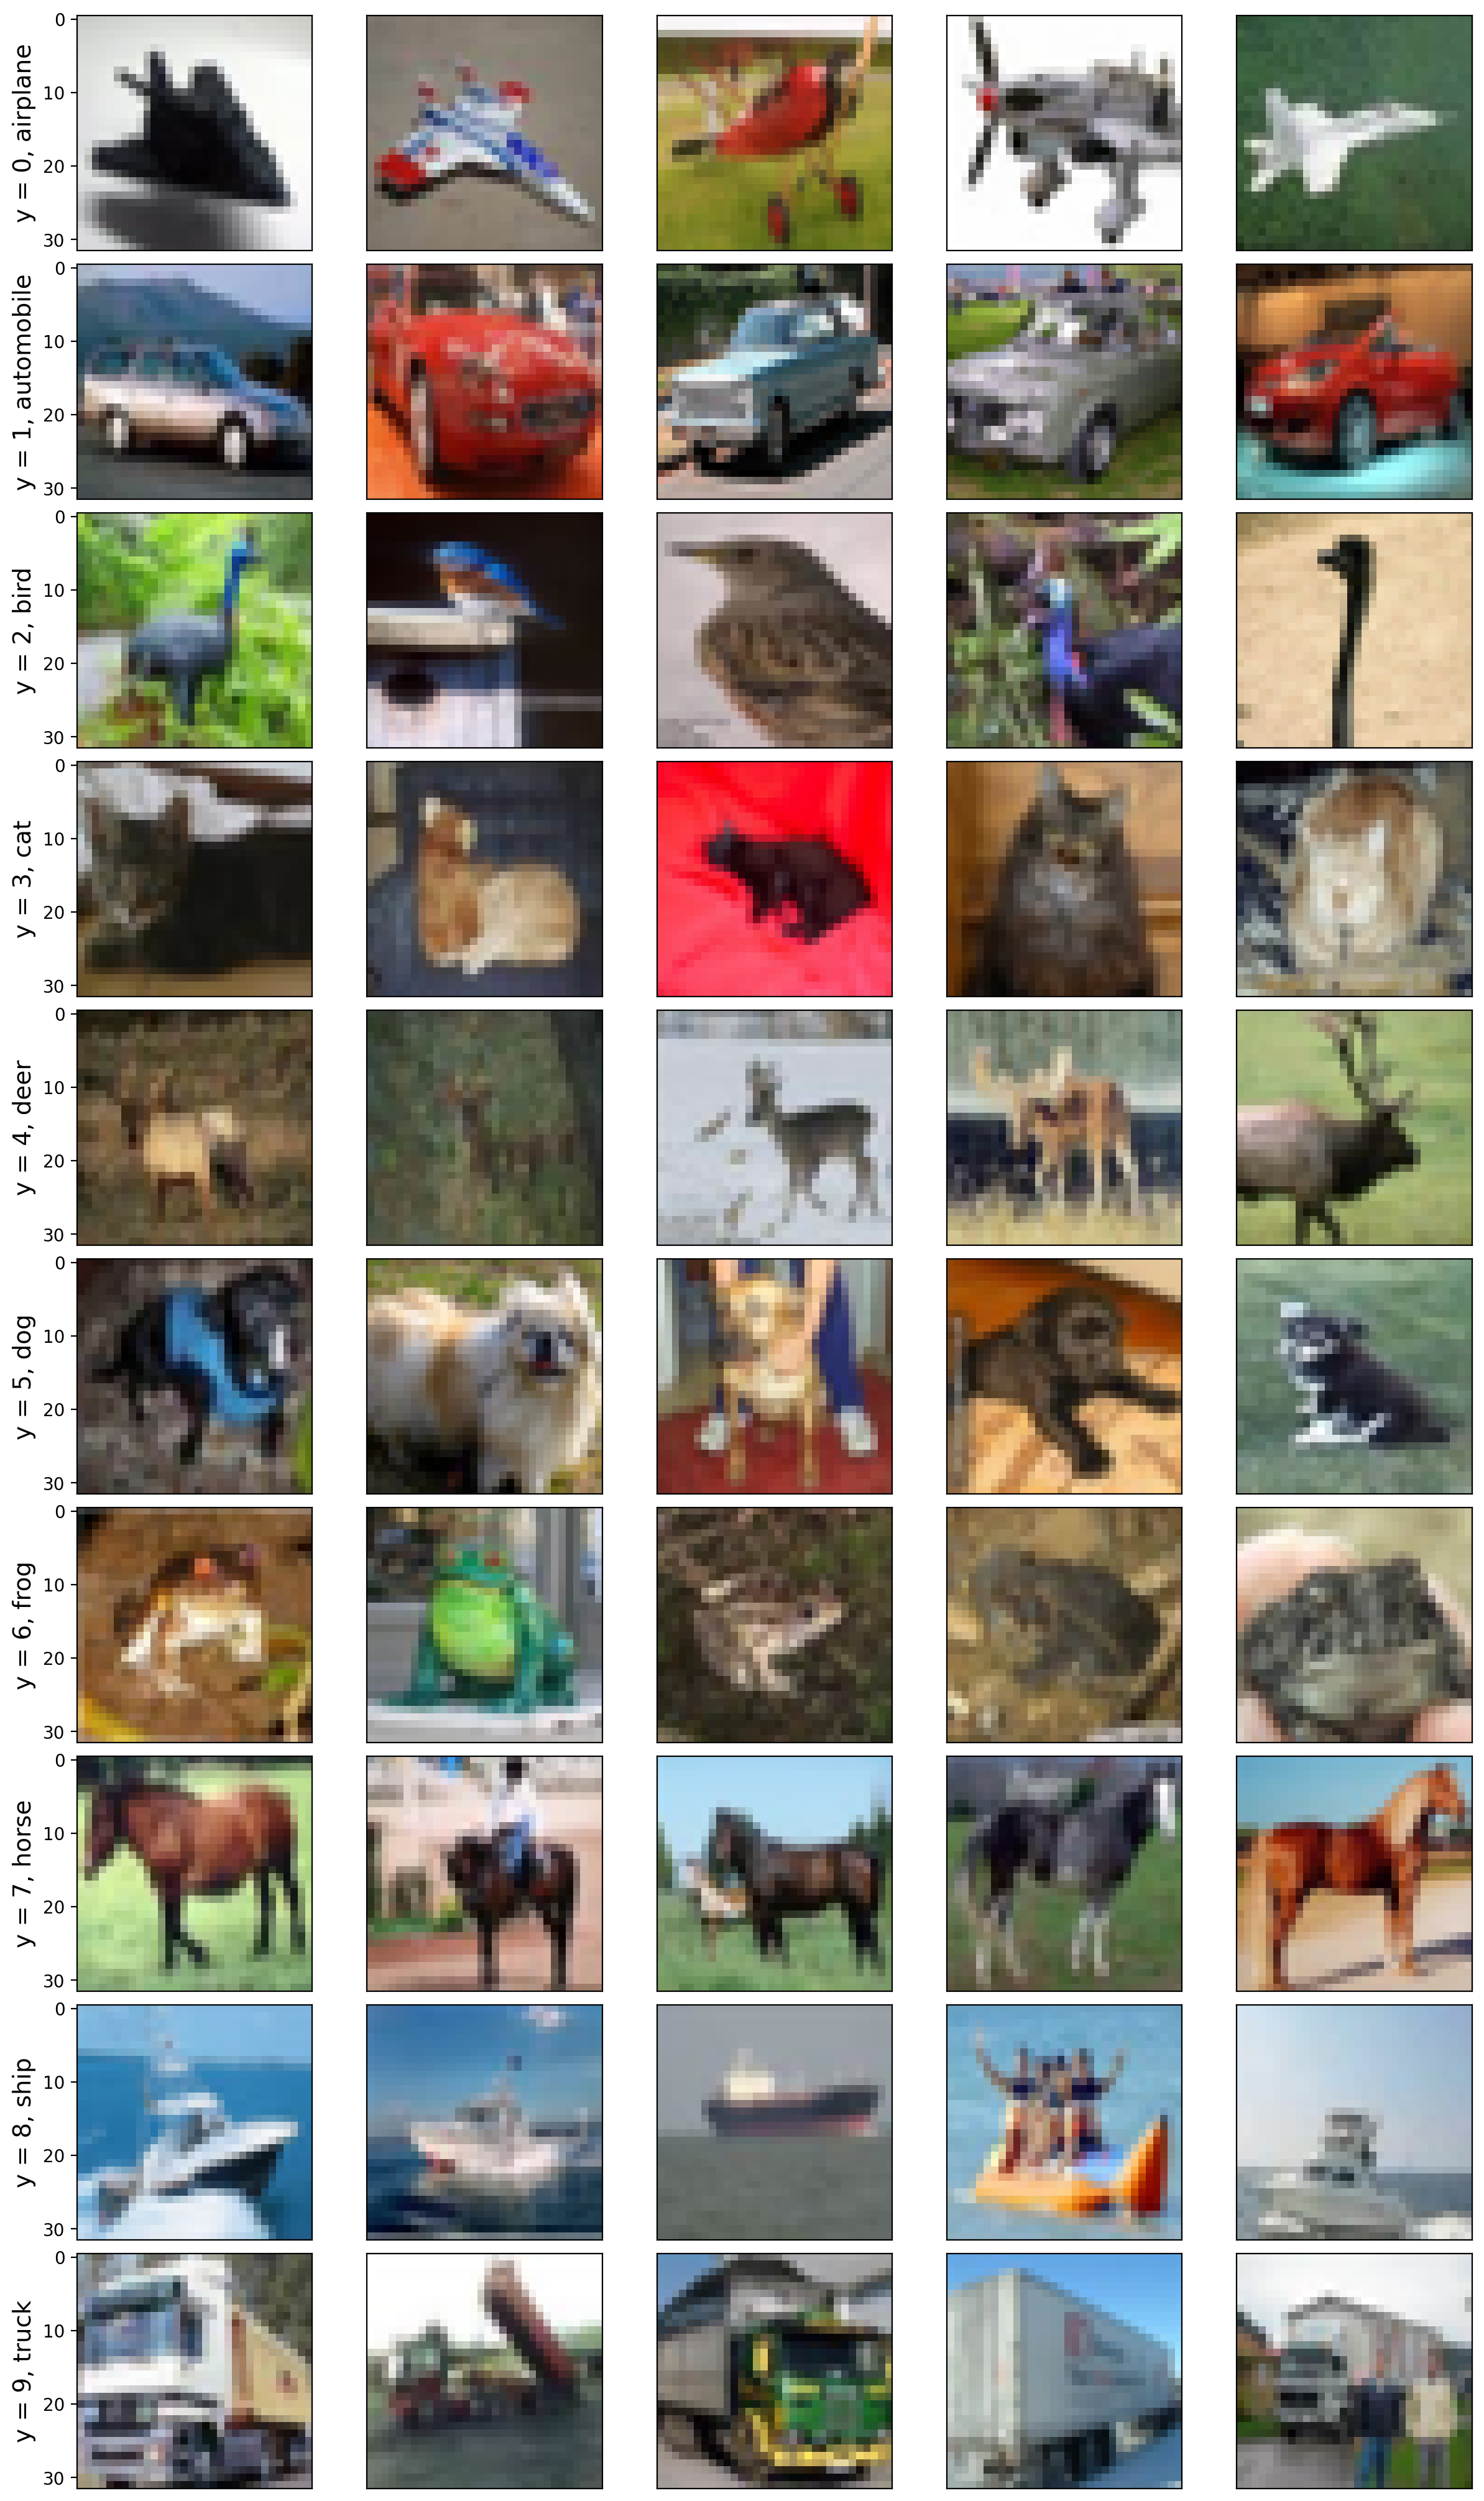

In [3]:
# visualize 5 images per class
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog",
          "frog", "horse", "ship", "truck"]

fig = plt.figure(constrained_layout=True, figsize=(12, 20))
axes = fig.subplots(nrows=10, ncols=5, sharey=True)

for i in range(10):
  ims = X_train[y_train[:, 0]== i][:5]
  for j in range(5):
    axes[i, j].imshow(ims[j])
    if j != 0:
          axes[i, j].yaxis.set_visible(False)
    if j == 0:
          axes[i, j].set_ylabel(f"y = {i}, {labels[i]}", fontsize=14)
    axes[i, j].xaxis.set_visible(False)

---

## Step 2: Preprocess Data

In [4]:
# because intensity values of all 3 channles have the same scale (0 to 255)
# we can easily standardize data to have feature values between 0 and 1
X_train = X_train / 255.0
X_valid = X_valid / 255.0


---

## Step 3: Create Callbacks


The [`fit()` method](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit) accepts a `callbacks` argument that lets us specify a list of callbacks, i.e., routines invoked at some specific point in time during training (e.g., at the start and end of training, at the start and end of each epoch, etc.)

We are going to experiment with the following 3 callbacks:

- [`ModelCheckpoint` callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint): defines a checkpoint routine to save the current model weights at regular intervals (by default at the end of each epoch). We can configure it to save only the best model (so it overwrites the previously saved file).


-  [`EarlyStopping` callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping): implements early stopping with a specified patience criterion to prevent overfitting.  It stops training early if it measures no progress on the validation set for a specified number of epochs (defined by the `patience` argument).



- [`ReduceLROnPlateau` callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau): reduces the learning rate (learning rate decay) by a fixed factor when performance on the validation set has stopped improving.





In [6]:
# define a routine invoked at the end of each epoch to save the current model weights
# when training starts on Colab, you can find the file by opening the file navigation pane (click the files icon on the side bar)
# If you want to roll back to the best model, use: model = keras.models.load_model("my_model.h5")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True, verbose=1)

# define a routine that implement early stoping if it sees no more progress for 20 epochs
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, verbose=1)

# define a routine that reduces the leraning rate by multiplying 0.5 if it sees no improvements for 5 epochs
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, verbose=1)


---
## Step 4: Start building and training your model
You can start with a simple feedforward structure:

- Input layer: Flattened image vector. Converts each image into a 1D vector of 3072 features.
- Hidden layers: 1–2 Dense layers with ReLU activation.
- Output layer: Outputs raw logits for 10 classes corresponding to CIFAR-10 categories.

This is a simple architecture with no regularization or normalization. Serves as a baseline for comparison before applying enhancements.







In [7]:
from tensorflow.keras import regularizers

In [9]:
# Starter code
np.random.seed(1)
tf.random.set_seed(1)

# Type you code below


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),

    tf.keras.layers.Dense(1024, use_bias=False, kernel_regularizer=regularizers.l2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.30),

    tf.keras.layers.Dense(512, use_bias=False, kernel_regularizer=regularizers.l2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(256, use_bias=False, kernel_regularizer=regularizers.l2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.20),

    tf.keras.layers.Dense(128, use_bias=False, kernel_regularizer=regularizers.l2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10)  # logits
])





# Compile the model with SGD optimizer and Nesterov momentum

optimizer = tf.keras.optimizers.SGD(learning_rate=0.05,
                                    momentum=0.9,
                                    nesterov=True)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=90,
    batch_size=64,
    validation_data=(X_valid, y_valid),
    verbose=1,
    callbacks=[early_stopping_cb, checkpoint_cb,lr_scheduler]
)



# Train the model with learning rate decay

history = model.fit(
    X_train,
    y_train,
    epochs=50,              # Number of epochs (adjust as needed)
    batch_size=64,          # means the model processes 64 images at a time, computes the loss, and updates weights using the optimizer.
    validation_data=(X_valid, y_valid),  # Validation data
    verbose=1
)










Epoch 1/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3223 - loss: 1.9197
Epoch 1: val_loss did not improve from 1.64937
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.3224 - loss: 1.9195 - val_accuracy: 0.3312 - val_loss: 1.9490 - learning_rate: 0.0500
Epoch 2/90
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4373 - loss: 1.6020
Epoch 2: val_loss improved from 1.64937 to 1.61782, saving model to my_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4373 - loss: 1.6019 - val_accuracy: 0.4246 - val_loss: 1.6178 - learning_rate: 0.0500
Epoch 3/90
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4754 - loss: 1.5032
Epoch 3: val_loss improved from 1.61782 to 1.58105, saving model to my_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4755 - loss: 1.5031 - val_accuracy: 0.4515 - val_loss: 1.5810 - learning_rate: 0.0500
Epoch 4/90
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5013 - loss: 1.4339
Epoch 4: val_loss did not improve from 1.58105
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5014 - loss: 1.4338 - val_accuracy: 0.4358 - val_loss: 1.6192 - learning_rate: 0.0500
Epoch 5/90
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5223 - loss: 1.3865
Epoch 5: val_loss improved from 1.58105 to 1.53057, saving model to my_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5224 - loss: 1.3862 - val_accuracy: 0.4729 - val_loss: 1.5306 - learning_rate: 0.0500
Epoch 6/90
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5370 - loss: 1.3417
Epoch 6: val_loss did not improve from 1.53057
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5370 - loss: 1.3415 - val_accuracy: 0.4778 - val_loss: 1.5309 - learning_rate: 0.0500
Epoch 7/90
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5511 - loss: 1.3026
Epoch 7: val_loss did not improve from 1.53057
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5513 - loss: 1.3024 - val_accuracy: 0.4872 - val_loss: 1.5335 - learning_rate: 0.0500
Epoch 8/90
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5675 - loss: 1.2637
Epoch 8: val_loss improved from 1.53057 to 1.52199, saving model to my_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5676 - loss: 1.2635 - val_accuracy: 0.4878 - val_loss: 1.5220 - learning_rate: 0.0500
Epoch 9/90
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5810 - loss: 1.2337
Epoch 9: val_loss did not improve from 1.52199
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5811 - loss: 1.2336 - val_accuracy: 0.4670 - val_loss: 1.6148 - learning_rate: 0.0500
Epoch 10/90
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5937 - loss: 1.2014
Epoch 10: val_loss did not improve from 1.52199
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5938 - loss: 1.2013 - val_accuracy: 0.4717 - val_loss: 1.5921 - learning_rate: 0.0500
Epoch 11/90
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5983 - loss: 1.1812
Epoch 11: val_loss improved from 1.52199 to 1.51337, saving model to my_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5984 - loss: 1.1811 - val_accuracy: 0.4970 - val_loss: 1.5134 - learning_rate: 0.0500
Epoch 12/90
769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6120 - loss: 1.1516
Epoch 12: val_loss did not improve from 1.51337
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6120 - loss: 1.1514 - val_accuracy: 0.4804 - val_loss: 1.6087 - learning_rate: 0.0500
Epoch 13/90
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6242 - loss: 1.1183
Epoch 13: val_loss improved from 1.51337 to 1.51066, saving model to my_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6242 - loss: 1.1182 - val_accuracy: 0.5027 - val_loss: 1.5107 - learning_rate: 0.0500
Epoch 14/90
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6285 - loss: 1.0968
Epoch 14: val_loss did not improve from 1.51066
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6285 - loss: 1.0967 - val_accuracy: 0.4879 - val_loss: 1.5612 - learning_rate: 0.0500
Epoch 15/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6412 - loss: 1.0737
Epoch 15: val_loss did not improve from 1.51066
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6412 - loss: 1.0737 - val_accuracy: 0.5023 - val_loss: 1.5335 - learning_rate: 0.0500
Epoch 16/90
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6478 - loss: 1.0609
Epoch 16: val_loss did not improve from 1.51066
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6479 - loss: 1.0608 - val_accuracy: 0.4798 - val_loss: 1.6903 - learning_rate: 0.0500
Epoch 17/90
779/782 ━━━━━━━━━━━

---
## Step 5: Advanced Architecture and Hyperparameter Fine-Tuning

Build a deeper feedforward neural network architecture with multiple hidden layers to increase model capacity. Apply Batch Normalization to stabilize and accelerate learning and use Dropout between layers to prevent overfitting.




Tips:

1) GPU backend is not guaranteed for free users on Colab. Its availability fluctuates from time to time. But using GPU can make your model training much faster. To enable GPU backend for your notebook: Choose Runtime at the navigation bar -> Change runtime type -> Hardware Accelerator -> Choose T4 GPU from the dropdown list.

2) A relatively large batch size (e.g., 128, 256, and 512) allows us to exploit the potential of vectorization, and can thereby make your training faster. With GPU backend, running one epoch should take no more than 4 seconds.


3) If you want to try [`SGD()`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD), use this code and adjust the learning rate:

        optimizer = keras.optimizers.SGD(learning_rate=... , momentum=0.9, nesterov=True)

    Learning rate decay implemented through the `ReduceLROnPlateau` callback can also help.


4) Try to use Batch Norm (the [`BatchNormalization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization) layer). Don't use Batch Norm for the output layer.

5) If you want to use both [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) and batch normalization, put a Dropout layer after a Batch Norm layer. Don't use Dropout for the output layer.

6) When using dropout, training loss and accuracy reported during training is not reliable, as they are evaluated on random subsets of the full model. Run `model.evaluate(X_train, y_train)` after training to get the training loss and accuracy without dropout. Compare it with the training set criterion (i.e., accuracy > 90% ).

7) [L2 regularization](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L2) may also help.





In [ ]:
# Starter code
np.random.seed(1)
tf.random.set_seed(1)

# Type you code below


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),

    tf.keras.layers.Dense(1024, use_bias=False, kernel_regularizer=regularizers.l2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.30),

    tf.keras.layers.Dense(512, use_bias=False, kernel_regularizer=regularizers.l2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(256, use_bias=False, kernel_regularizer=regularizers.l2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.20),

    tf.keras.layers.Dense(128, use_bias=False, kernel_regularizer=regularizers.l2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10)  # logits
])



# Compile the model with SGD optimizer and Nesterov momentum

optimizer = tf.keras.optimizers.SGD(learning_rate=0.05,
                                    momentum=0.9,
                                    nesterov=True)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=90,
    batch_size=64,
    validation_data=(X_valid, y_valid),
    verbose=1,
    callbacks=[early_stopping_cb, checkpoint_cb,lr_scheduler]
)



# Train the model with learning rate decay

history = model.fit(
    X_train,
    y_train,
    epochs=50,              # Number of epochs (adjust as needed)
    batch_size=64,          # means the model processes 64 images at a time, computes the loss, and updates weights using the optimizer.
    validation_data=(X_valid, y_valid),  # Validation data
    verbose=1
)




### Your Final and Best Model

<b>Double click this cell to enter best model accuracy metrics for different attempts.</b>  

The final model: (Training accuracy: ???; validation accuracy: ???)



## Step 6: Documentation & Reflection

- Summarize your tuning process and rationale for architectural choices.
- Highlight which changes led to performance improvements.
- Discuss challenges encountered during tuning.


Double click this cell to enter your answer below:

**Your Answer:**


## Step 7: Build a CNN Model

In this step, you will build a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset and compare its performance with the Feedforward Neural Network (FNN) developed earlier. CNNs are specifically designed to capture spatial hierarchies and local patterns in image data through convolutional operations, making them more effective for visual tasks.



Tips:
- Uses convolutional layers; try different filter sizes (e.g., 32, 64) to extract spatial features.
- Applies MaxPooling to reduce spatial dimensions and computational load.
- Includes Batch Normalization to stabilize and accelerate training.
- Transitions to fully connected layers after feature extraction.
- Adjust the number of layers and neuron units to optimize performance.
- Uses ReLU activation in hidden layers for non-linearity.
- Applies Dropout to reduce overfitting and improve generalization.
- Ends with a softmax output layer for multi-class classification.


In [ ]:
# Starter code
np.random.seed(1)
tf.random.set_seed(1)

# Type you code below










# Compile the model with SGD optimizer and Nesterov momentum



# Train the model with learning rate decay







## Step 8: Evaluate the CNN Model and Compare with FNN

- Evaluate the CNN model performance.
- Compare with the FNN model.
- Discuss how CNN model extract spatial features leads to better performance.
- Highlight architectural advantages of CNN over FNN for image classification.





Double click this cell to enter your answer below:

**Your Answer:**
